In [1]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score


from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [2]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

In [3]:
train = pd.read_csv("../../../resources/data/titanic/train.csv")
train['Sex'] = (train['Sex']=='male').astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


<h2> Invwstigation of likehood and baysian throw features </h2>

In [4]:
label= 'Survived'
for i in train[label].unique():
        stats = train[train[label] == i].describe()
        
stats

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,0.466660,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,0.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,0.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,1.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200


In [5]:
def get_stats(data, label):
    result = {}
    for i in train[label].unique():
        stats = train[train[label] == i].describe()  #[feature]
        result[i] = stats
    
    return result

In [6]:
label = 'Survived'
feature = 'Pclass'

In [7]:

stats = get_stats(train, label = label)
stats[0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,0.354968,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,1.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,1.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,1.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,1.000000,74.000000,8.000000,6.000000,263.000000


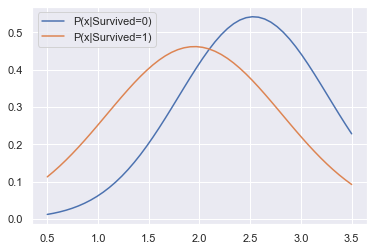

In [8]:
x = np.linspace(0.5,3.5)
for label_value in stats:
    y = norm.pdf(x, stats[label_value][feature]['mean'], stats[label_value][feature]['std'])
    plt.plot(x,y,label=r'P(x|{}={})'.format(label,label_value))
plt.legend()    

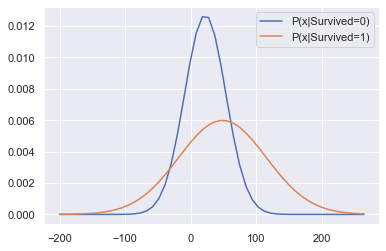

In [9]:
feature = 'Fare'
x = np.linspace(-200,264)
for label_value in stats:
    y = norm.pdf(x, stats[label_value][feature]['mean'], stats[label_value][feature]['std'])
    plt.plot(x,y,label=r'P(x|{}={})'.format(label,label_value))
plt.legend()  

from above graphic we can figure out the likelihood functions of Pclass for survived and not survivded.For class=1 the likehood for survive is hohher the not sur .....

In [10]:
prob = train.groupby(by=label,axis=0)[label].count()/len(train[label])
prob

Survived
0    0.616162
1    0.383838
Name: Survived, dtype: float64

we can calculate baysian $$P(y| x_1,x_2,...,x_n ) \propto p(y)\prod_{i=0}^{n}P(x_i|y)$$

 $$ p(survived=1)P(x|survived=1)$$
  $$ p(survived=0)P(x|survived=0)$$

In [28]:
stats

{0:        PassengerId  Survived      Pclass         Sex         Age       SibSp  \
 count   549.000000     549.0  549.000000  549.000000  424.000000  549.000000   
 mean    447.016393       0.0    2.531876    0.852459   30.626179    0.553734   
 std     260.640469       0.0    0.735805    0.354968   14.172110    1.288399   
 min       1.000000       0.0    1.000000    0.000000    1.000000    0.000000   
 25%     211.000000       0.0    2.000000    1.000000   21.000000    0.000000   
 50%     455.000000       0.0    3.000000    1.000000   28.000000    0.000000   
 75%     675.000000       0.0    3.000000    1.000000   39.000000    1.000000   
 max     891.000000       0.0    3.000000    1.000000   74.000000    8.000000   
 
             Parch        Fare  
 count  549.000000  549.000000  
 mean     0.329690   22.117887  
 std      0.823166   31.388207  
 min      0.000000    0.000000  
 25%      0.000000    7.854200  
 50%      0.000000   10.500000  
 75%      0.000000   26.000000  
 m

In [30]:
for label_value in stats:
    print(label_value)    

0
1


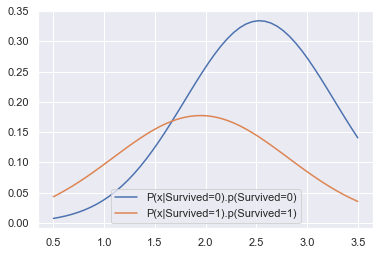

In [33]:
x = np.linspace(0.5,3.5)
for label_value in stats:
    y = norm.pdf(x, stats[label_value]['Pclass']['mean'], stats[label_value]['Pclass']['std'])*prob[label_value]
    plt.plot(x,y,label=r'P(x|{}={}).p({}={})'.format(label,label_value,label,label_value))
plt.legend()    

Including some baysian "?" we see that for $P_class=2$ likeli hood is different from just likehood ? ....................

we can make prediction only using "Pclass"

In [34]:
stats = get_stats(train, label = label)
def likelihood_table(x, label_stats ):
    #print('s',x.name)
    #print('s',x)
    result = {}
    for label_value in label_stats:
        print(type(x))
        print(x.name)
        print(label_value)
        stats_feature = label_stats[label_value][x.name]
        sigma = stats_feature['std']
        mu = stats_feature['mean']
        likelihood = norm.pdf(x, mu, sigma)
        #print('lik',likelihood)
        #print("name",x.name)
        #print('ww')
        result[label_value] = likelihood
        
    return result    

In [35]:
result = train[['Pclass','Sex']].apply(likelihood_table, label_stats=stats)

<class 'pandas.core.series.Series'>
Pclass
0
<class 'pandas.core.series.Series'>
Pclass
1
<class 'pandas.core.series.Series'>
Sex
0
<class 'pandas.core.series.Series'>
Sex
1


In [36]:
result

Pclass    {0: [0.4428484217683414, 0.06208117442645968, ...
Sex       {0: [1.0308758425089206, 0.06286050647427982, ...
dtype: object

In [37]:
pd.DataFrame(result.T)

,0
Pclass,"{0: [0.4428484217683414, 0.06208117442645968, ..."
Sex,"{0: [1.0308758425089206, 0.06286050647427982, ..."


In [38]:
not_survived = result['Pclass'][0]*result['Sex'][0]*prob[0]
survived = result['Pclass'][1]*result['Sex'][1]*prob[1]

In [39]:
predict = (survived>not_survived).astype(int)

In [40]:
accuracy_score(predict, train[label])

0.7867564534231201

In [41]:
result = train[['Pclass']].apply(likelihood_table, label_stats=stats)
not_survived = result['Pclass'][0]*prob[0]
survived = result['Pclass'][1]*prob[1]
predict = (survived>not_survived).astype(int)
accuracy_score(predict, train[label])

<class 'pandas.core.series.Series'>
Pclass
0
<class 'pandas.core.series.Series'>
Pclass
1


0.6790123456790124

In [42]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
result

Pclass    {0: [0.4428484217683414, 0.06208117442645968, ...
dtype: object

In [43]:
result = train[['Pclass','Sex','Fare','Age','SibSp']].apply(likelihood_table, label_stats=stats)
not_survived = result['Pclass'][0]*result['Sex'][0]*result['Fare'][0]*result['Age'][0]*result['SibSp'][0]*prob[0]
survived = result['Pclass'][1]*result['Sex'][1]*result['Fare'][1]*result['Age'][1]*result['SibSp'][1]*prob[1]
predict = (survived>=not_survived).astype(int)
accuracy_score(predict, train[label])

<class 'pandas.core.series.Series'>
Pclass
0
<class 'pandas.core.series.Series'>
Pclass
1
<class 'pandas.core.series.Series'>
Sex
0
<class 'pandas.core.series.Series'>
Sex
1
<class 'pandas.core.series.Series'>
Fare
0
<class 'pandas.core.series.Series'>
Fare
1
<class 'pandas.core.series.Series'>
Age
0
<class 'pandas.core.series.Series'>
Age
1
<class 'pandas.core.series.Series'>
SibSp
0
<class 'pandas.core.series.Series'>
SibSp
1


0.7643097643097643

In [23]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb = GaussianNB()
train[['Pclass','Sex','Fare','Age','SibSp']]

,Pclass,Sex,Fare,Age,SibSp
0,3,1,7.2500,22.0,1
1,1,0,71.2833,38.0,1
2,3,0,7.9250,26.0,0
3,1,0,53.1000,35.0,1
4,3,1,8.0500,35.0,0
...,...,...,...,...,...
886,2,1,13.0000,27.0,0
887,1,0,30.0000,19.0,0
888,3,0,23.4500,NaN,1
889,1,1,30.0000,26.0,0


In [45]:
gnb.fit(train[['Pclass','Sex']],train['Survived'])

GaussianNB()

In [46]:
predict = gnb.predict(train[['Pclass','Sex']])

0.7867564534231201